--- Original Data Head ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

--- 

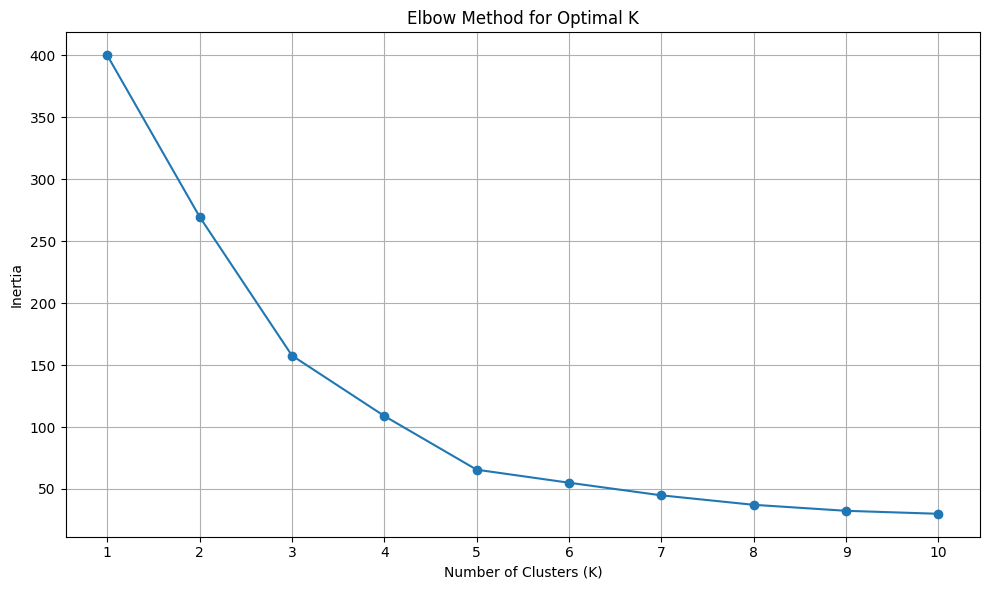

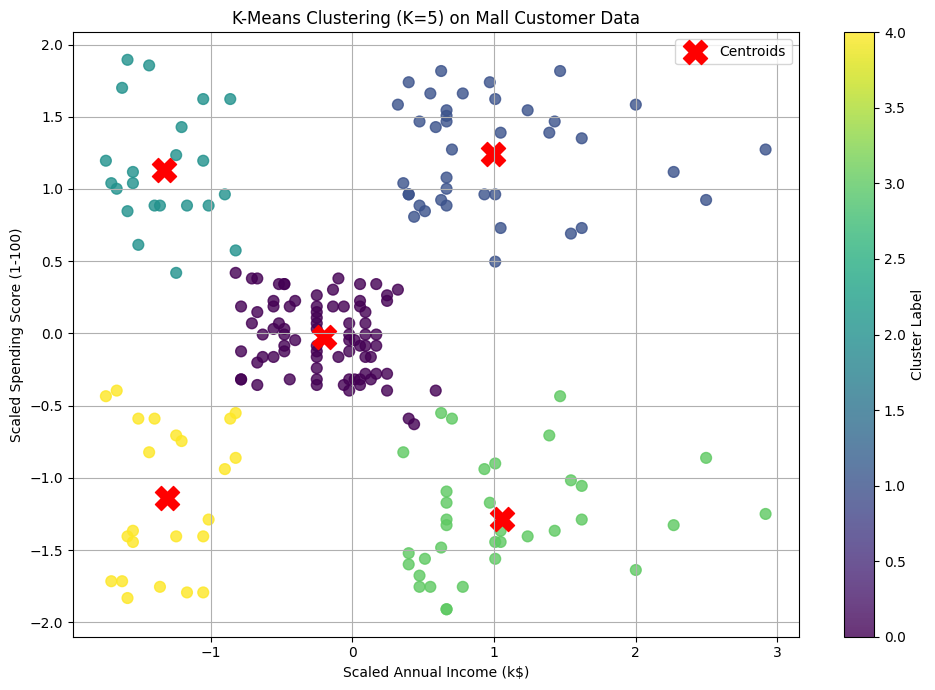

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np

# 1. Load and Preprocess Dataset
df = pd.read_csv(r'D:\ML PROJECTS\elevate labs intenship\task 8\Mall_Customers.csv')

# Selecting relevant features for clustering: Annual Income (k$) and Spending Score (1-100)
# CustomerID is an identifier and Gender is categorical, we'll focus on the numerical behavioral features for simplicity in clustering.
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("--- Original Data Head ---")
print(df.head())
print("\n--- DataFrame Info ---")
df.info()
print("\n--- Scaled Features (first 5 rows) ---")
print(X_scaled[:5])

# 2. Elbow Method to find optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
# plt.savefig('elbow_method.png') # Placeholder for saving plot
# plt.show() # In a real script, you'd show this

print("\n--- Elbow Method Results (Inertia for K=1 to 10) ---")
for i, val in enumerate(inertia):
    print(f"K={i+1}: Inertia={val:.2f}")

# Based on typical Mall Customer segmentation, K=5 is often identified as optimal.
# Let's assume optimal_k = 5 from the elbow plot.
optimal_k = 5

# 3. Fit K-Means and Assign Cluster Labels
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(X_scaled)
df['Cluster'] = clusters

print(f"\n--- K-Means Clustering with K={optimal_k} ---")
print("Number of points per cluster:")
print(df['Cluster'].value_counts().sort_index())

# 4. Visualize Clusters with color-coding
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=60, alpha=0.8)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering (K={optimal_k}) on Mall Customer Data')
plt.xlabel('Scaled Annual Income (k$)')
plt.ylabel('Scaled Spending Score (1-100)')
plt.colorbar(scatter, label='Cluster Label')
plt.legend()
plt.grid(True)
plt.tight_layout()
# plt.savefig(f'kmeans_clusters_k{optimal_k}.png') # Placeholder for saving plot
# plt.show() # In a real script, you'd show this

# 5. Evaluate clustering using Silhouette Score
score = silhouette_score(X_scaled, clusters)
print(f"\n--- Silhouette Score for K={optimal_k} ---")
print(f"Silhouette Score: {score:.3f}")

